## Plot CDF for SWE datasets (Quebec)

Comparing distribution of SWE datasets used for SSUM classifications

In [20]:
import xarray as xr
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio
from rasterio.plot import show
from osgeo import gdal
import seaborn as sns

Import data and check metadata

In [21]:
from osgeo import gdal

# Test on NoahMP ECMW SWE data, clipped to Qubec in GEE. Exported. 
filepath = r"C:\Users\vicki\gee-swe-plots\NoahMP_ecmw_SWE_Quebec_5km_month01.tif" #this is actually month02, change filename later

# Open the file:
raster = gdal.Open(filepath)

# Check type of the variable 'raster'
type(raster)

osgeo.gdal.Dataset

In [22]:
# Read Raster File Properties 

# Projection
raster.GetProjection()

# Dimensions
raster.RasterXSize
raster.RasterYSize

# Number of bands
raster.RasterCount

# Metadata for the raster dataset
raster.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [23]:
raster.RasterXSize

3725

In [24]:
raster.RasterYSize

224

In [25]:
# Get raster bands
band = raster.GetRasterBand(1)

# Check type of the variable 'band'
type(band)

# Data type of the values
gdal.GetDataTypeName(band.DataType)

'Float64'

In [26]:
# Compute statistics if needed
if band.GetMinimum() is None or band.GetMaximum()is None:
    band.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band.GetNoDataValue()) # none
print ("[ MIN ] = ", band.GetMinimum())
print ("[ MAX ] = ", band.GetMaximum())

[ NO DATA VALUE ] =  None
[ MIN ] =  -1.0
[ MAX ] =  442.1798849276


Option 1: Sort and Plot 

In [27]:
# Read raster data as numeric array from GDAL Dataset
rasterArray = raster.ReadAsArray()

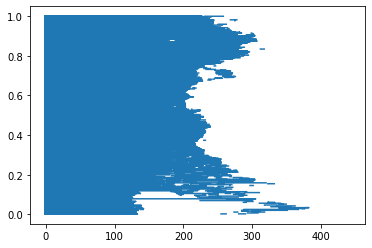

In [28]:
# use flatten to take a 2-D array and turn it into a 1-D array
flattened_raster_data = rasterArray.flatten()

# # sort the values from low to high
# sorted_raster_data = flattened_raster_data.sort()

# make y-values (fractions 0-1, same length as the raster data)
n = flattened_raster_data.size
y = np.linspace(0, 1, n)

# plot it
plt.plot(flattened_raster_data, y)


C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.7460e+03, 0.0000e+00, 9.7910e+03, 1.9752e+04, 1.2404e+04,
        6.6980e+03, 1.5380e+03, 4.5000e+01, 2.1000e+01, 1.0000e+00]),
 array([ -1.        ,  43.31798849,  87.63597699, 131.95396548,
        176.27195397, 220.58994246, 264.90793096, 309.22591945,
        353.54390794, 397.86189643, 442.17988493]),
 <a list of 10 Patch objects>)

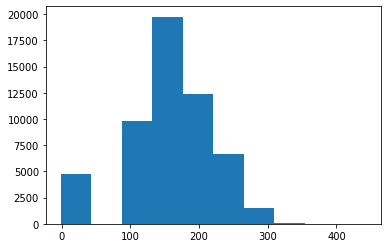

In [29]:
plt.hist(flattened_raster_data)

Option 2: plot as hist

(array([0.08629719, 0.08629719, 0.26432831, 0.62348171, 0.84902538,
        0.97081606, 0.99878173, 0.99959997, 0.99998182, 1.        ]),
 array([ -1.        ,  43.31798849,  87.63597699, 131.95396548,
        176.27195397, 220.58994246, 264.90793096, 309.22591945,
        353.54390794, 397.86189643, 442.17988493]),
 <a list of 1 Patch objects>)

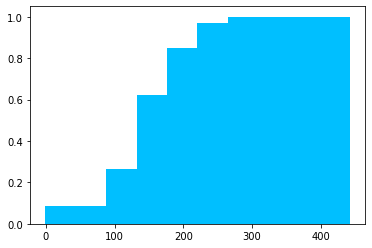

In [30]:
# plot using hist
# https://matplotlib.org/examples/statistics/histogram_demo_cumulative.html

plt.hist(flattened_raster_data, density=True, cumulative=True, label='CDF',
         histtype='stepfilled', color='deepskyblue')

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'top_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


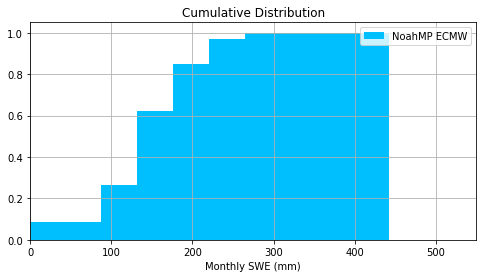

In [31]:
# tidy up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data, density=True, cumulative=True, label='NoahMP ECMW',
         histtype='stepfilled', color='deepskyblue')

ax.grid(True)
ax.set_xlim(0,550)
ax.legend(loc='top_right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('Monthly SWE (mm)')
# ax.set_ylabel('Likelihood of occurrence')

plt.show()

In [32]:
# Test on NoahMP GDAS SWE data, clipped to Qubec in GEE. Exported. 

filepath2 = r"C:\Users\vicki\gee-swe-plots\NoahMP_gdas_SWE_Quebec_5km_month02.tif"

# Open the file:
raster2 = gdal.Open(filepath2)

In [33]:
# Dimensions
raster2.RasterXSize
raster2.RasterYSize

374

In [34]:
# Get raster bands
band2 = raster2.GetRasterBand(1)

# Compute statistics if needed
if band2.GetMinimum() is None or band2.GetMaximum()is None:
    band2.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band2.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band2.GetNoDataValue()) # none
print ("[ MIN ] = ", band2.GetMinimum())
print ("[ MAX ] = ", band2.GetMaximum())

[ NO DATA VALUE ] =  None
[ MIN ] =  -1.0
[ MAX ] =  534.84867862449


C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


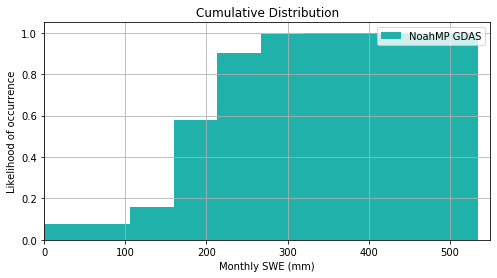

In [35]:
# Read raster data as numeric array from GDAL Dataset
rasterArray2 = raster2.ReadAsArray()

# use flatten to take a 2-D array and turn it into a 1-D array
flattened_raster_data2 = rasterArray2.flatten()

# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data2, density=True, cumulative=True, label='NoahMP GDAS',
         histtype='stepfilled', color='lightseagreen')

ax.grid(True)
ax.set_xlim(0,550)
ax.legend(loc='top_right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('Monthly SWE (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


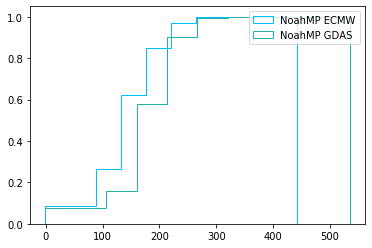

In [36]:
# plot the stacked cumulative histogram

import numpy
from matplotlib import pyplot

pyplot.hist(flattened_raster_data, density=True, cumulative=True, label='NoahMP ECMW', histtype='step', color='deepskyblue')
pyplot.hist(flattened_raster_data2, density=True, cumulative=True, label='NoahMP GDAS',histtype='step', color='lightseagreen')
pyplot.legend(loc='upper right')
pyplot.show()

In [37]:
# Test on GlobSnow SWE data, clipped to Qubec in GEE. Exported. 
filepath3 = r"C:\Users\vicki\gee-swe-plots\GlobSnow_SWE_Quebec_5km_month02.tif"

# Open the file:
raster3 = gdal.Open(filepath3)

In [38]:
# Get raster bands
band3 = raster3.GetRasterBand(1)

# Compute statistics if needed
if band3.GetMinimum() is None or band3.GetMaximum()is None:
    band3.ComputeStatistics(0)
    print("Statistics computed.")

# Fetch metadata for the band
band3.GetMetadata()

# Print only selected metadata:
print ("[ NO DATA VALUE ] = ", band3.GetNoDataValue()) # none
print ("[ MIN ] = ", band3.GetMinimum())
print ("[ MAX ] = ", band3.GetMaximum())

[ NO DATA VALUE ] =  None
[ MIN ] =  -2.0
[ MAX ] =  167.76470947266


C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Unrecognized location 'top_right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  app.launch_new_instance()


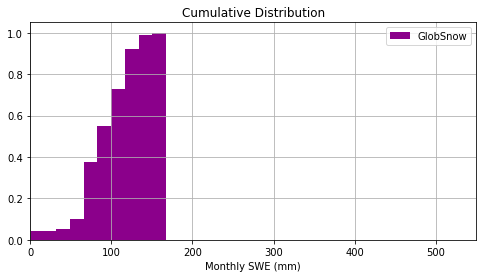

In [39]:
# Read raster data as numeric array from GDAL Dataset
rasterArray3 = raster3.ReadAsArray()

# use flatten to take a 2-D array and turn it into a 1-D array
flattened_raster_data3 = rasterArray3.flatten()

# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data3, density=True, cumulative=True, label='GlobSnow',
         histtype='stepfilled', color='darkmagenta')

ax.grid(True)
ax.set_xlim(0,550)
ax.legend(loc='top_right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('Monthly SWE (mm)')
# ax.set_ylabel('Likelihood of occurrence')

plt.show()

AttributeError: 'Line2D' object has no property 'density'

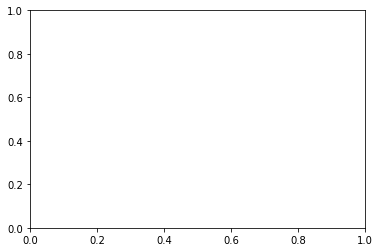

In [40]:
sns.kdeplot(flattened_raster_data1, density=True, cumulative=True, label='NoahMP ECMW', histtype='step', color='deepskyblue')
sns.kdeplot(flattened_raster_data2, density=True, cumulative=True, label='NoahMP GDAS',histtype='step', color='lightseagreen')
sns.kdeplot(flattened_raster_data3, density=True, cumulative=True, label='GlobSnow', histtype='step', color='darkmagenta')


C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


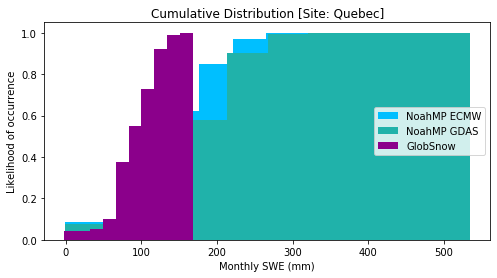

In [61]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data, density=True, cumulative=True, label='NoahMP ECMW',
         histtype='stepfilled', color='deepskyblue')

# plot the cumulative histogram
ax.hist(flattened_raster_data2, density=True, cumulative=True, label='NoahMP GDAS',
         histtype='stepfilled', color='lightseagreen')

# plot the cumulative histogram
ax.hist(flattened_raster_data3, density=True, cumulative=True, label='GlobSnow',
         histtype='stepfilled', color='darkmagenta')

ax.grid(False)
ax.legend(loc='right')
ax.set_title('Cumulative Distribution [Site: Quebec]')
ax.set_xlabel('Monthly SWE (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

## CDFs smoothed out

In [62]:
import matplotlib.pyplot as plt
from osgeo import gdal

# Test on ECMW, GDAS, GlobSnow SWE data, clipped to CLPX in GEE. Exported. 
filepath1 = r"C:\Users\vicki\gee-swe-plots\NoahMP_ecmw_SWE_Quebec_5km_month01.tif"
filepath2 = r"C:\Users\vicki\gee-swe-plots\NoahMP_gdas_SWE_Quebec_5km_month02.tif"
filepath3 = r"C:\Users\vicki\gee-swe-plots\GlobSnow_SWE_Quebec_5km_month02.tif"

# Open the file:
raster1 = gdal.Open(filepath1)
raster2 = gdal.Open(filepath2)
raster3 = gdal.Open(filepath3)

In [63]:
# Read raster data as numeric array from GDAL Dataset
rasterArray1 = raster1.ReadAsArray()
rasterArray2 = raster2.ReadAsArray()
rasterArray3 = raster3.ReadAsArray()

# use flatten to take a 2-D array and turn it into a 1-D array
flattened_raster_data1 = rasterArray1.flatten()
flattened_raster_data2 = rasterArray2.flatten()
flattened_raster_data3 = rasterArray3.flatten()

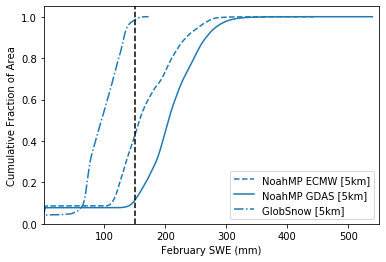

In [64]:
# Smooth out the lines
sns.kdeplot(flattened_raster_data1, cumulative=True, bw=1.5, label='NoahMP ECMW [5km]', color='#1f78b4', linestyle= '--')
sns.kdeplot(flattened_raster_data2, cumulative=True, bw=1.5, label='NoahMP GDAS [5km]', color='#1f78b4')
sns.kdeplot(flattened_raster_data3, cumulative=True, bw=1.5, label='GlobSnow [5km]', color='#1f78b4', linestyle= '-.')

plt.legend(loc='lower right')
plt.xlabel('February SWE (mm)')
plt.ylabel('Cumulative Fraction of Area')
plt.xlim(1,550)
plt.axvline(x=150, color='k', linestyle='--')

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Pixel Count')

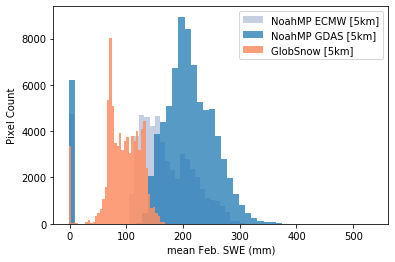

In [76]:
plt.hist(flattened_raster_data1, bins=50, label='NoahMP ECMW [5km]', color='#8da0cb', alpha=0.5)
plt.hist(flattened_raster_data2, bins=50, label='NoahMP GDAS [5km]', color='#1f78b4',  alpha=0.75)
plt.hist(flattened_raster_data3, bins=40, label='GlobSnow [5km]', color='#fc8d62',  alpha=0.85)
plt.legend(loc='upper right')
# plt.xlim(xmin=1, xmax = 550)
# plt.ylim(ymin=0, ymax = 350)

plt.xlabel('mean Feb. SWE (mm)')
plt.ylabel('Pixel Count')

There's a lot of os, so I'm going to remove those. 

In [67]:
# treat 0's as nans 

x1 = flattened_raster_data1[~np.isnan(flattened_raster_data1)]
x2 = flattened_raster_data2[~np.isnan(flattened_raster_data2)]
x3 = flattened_raster_data3[~np.isnan(flattened_raster_data3)]

# code to replace all negative value with 0 
# flattened_raster_data4[flattened_raster_data4 < 0] = 0
  
# printing result 
print("New resulting array: ", x1)

New resulting array:  [133.57486801 130.74942938 128.04266276 ... 174.20463547 170.99278274
 164.56295218]


In [94]:
min(x3)

-2.0

Text(0, 0.5, 'Cumulative Fraction of Area')

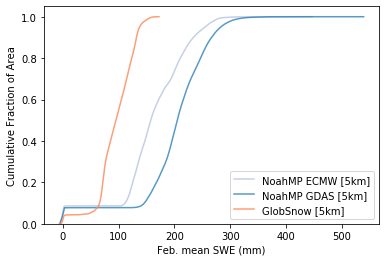

In [68]:
# Smooth out the lines
fig = sns.kdeplot(x1, cumulative=True, bw=1.5, label='NoahMP ECMW [5km]', color='#8da0cb', alpha=0.5)
fig = sns.kdeplot(x2, cumulative=True, bw=1.5, label='NoahMP GDAS [5km]', color='#1f78b4',  alpha=0.75)
fig = sns.kdeplot(x3, cumulative=True, bw=1.5, label='GlobSnow [5km]', color='#fc8d62',  alpha=0.85)

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
# plt.xlim(1,100)
plt.xlabel('Feb. mean SWE (mm)')
plt.ylabel('Cumulative Fraction of Area')

Text(0.5, 0, 'mean Feb. SWE (mm)')

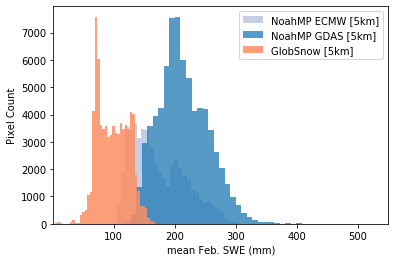

In [77]:
# damn, hella 0s. Let's just leave those out..and see what that looks like
t1 = x1[x1>0]
t2 = x2[x2>0]
t3 = x3[x3>0]

plt.hist(t1, bins=50, label='NoahMP ECMW [5km]', color='#8da0cb', alpha=0.5)
plt.hist(t2, bins=50, label='NoahMP GDAS [5km]', color='#1f78b4',  alpha=0.75)
plt.hist(t3, bins=40, label='GlobSnow [5km]', color='#fc8d62',  alpha=0.85)

plt.legend(loc='upper right')
plt.xlim(xmin=1, xmax = 550)
# plt.ylim(ymin=1, ymax = 1000)

plt.ylabel('Pixel Count')
plt.xlabel('mean Feb. SWE (mm)')

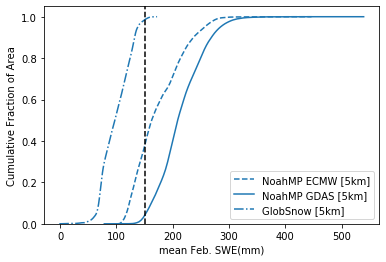

In [82]:
# let's do this again then, without 0s 
sns.kdeplot(t1, cumulative=True, bw=1.5, label='NoahMP ECMW [5km]', color='#1f78b4', linestyle= '--')
sns.kdeplot(t2, cumulative=True, bw=1.5, label='NoahMP GDAS [5km]', color='#1f78b4')
sns.kdeplot(t3, cumulative=True, bw=1.5, label='GlobSnow [5km]', color='#1f78b4', linestyle= '-.')

# fig.figure.suptitle("Plot", fontsize = 24)
plt.legend(loc='lower right')
# plt.xlim(1,100)
plt.xlabel('mean Feb. SWE(mm)')
plt.ylabel('Cumulative Fraction of Area')
plt.axvline(x=150, color='k', linestyle='--')

Summary Stats!

In [101]:
# let's do some summary stats right quick

import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

mean1 = statistics.mean(t1)
mean2 = statistics.mean(t2)
mean3 = statistics.mean(t3)

print(mean1)
print(mean2)
print(mean3)

173.44261001947405
213.7305239632375
98.38717


In [103]:
sd1 = np.std(t1, ddof=1)
sd2 = np.std(t2, ddof=1)
sd3 = np.std(t3, ddof=1)

print(sd1)
print(sd2)
print(sd3)

43.89135637925096
40.426516054315684
25.50121


In [121]:
# print percentiles 

p1 = np.percentile(t1, 5)
p2 = np.percentile(t1, 96)
p3 = np.percentile(t2, 5)
p4 = np.percentile(t2, 95)
p5 = np.percentile(t3, 5)
p6 = np.percentile(t3, 95)


print(p1)
print(p2)
print(p3)
print(p4)
print(p5)
print(p6)

117.78388921096926
261.0671159789207
152.18241112005896
284.59145018256515
64.64705657958984
137.8235321044922


In [ ]:
min1 = min(t1)
min2 = min(t2)
min3 = min(t3)

max1 = max(t1)
max2 = max(t2)
max3 = max(t3)

print(min1)
print(min2)
print(min3)

print(max1)
print(max2)
print(max3)

In [134]:
med1 = statistics.median(t1)
med2 = statistics.median(t2)
med3 = statistics.median(t3)

print(med1)
print(med2)
print(med3)

162.45206537951884
208.78901050326266
97.29412078857422


In [138]:
c1 = len(t1)
c2 = len(t2)
c3 = len(t3)

print(c1)
print(c2)
print(c3)

50250
73637
76488


{'whiskers': [<matplotlib.lines.Line2D at 0x2401a5e9860>,
 'caps': [<matplotlib.lines.Line2D at 0x2401a5e9f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x2401a5e9710>],
 'medians': [<matplotlib.lines.Line2D at 0x2401a5f9630>],
 'fliers': [<matplotlib.lines.Line2D at 0x2401a5f9978>],
 'means': []}

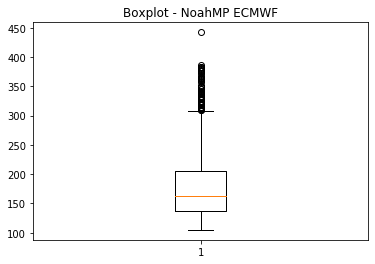

In [107]:
fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot - NoahMP ECMWF')
ax1.boxplot(t1)


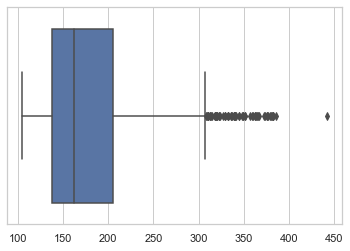

In [127]:
sns.set(style="whitegrid")

plt.figure()
ax = sns.boxplot(x=t1)

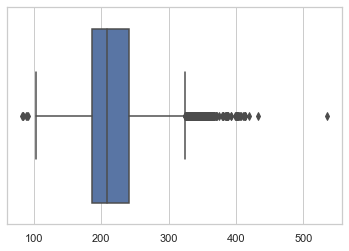

In [126]:
ax2 = sns.boxplot(x=t2)

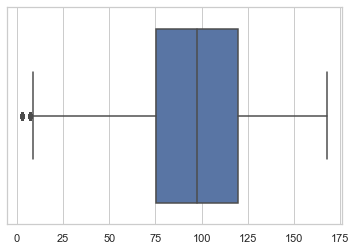

In [128]:
ax2 = sns.boxplot(x=t3)

ValueError: arrays must all be same length

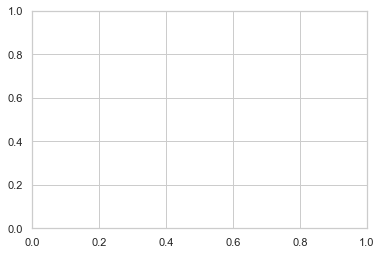

In [125]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,1) # create figure and axes

df = pd.DataFrame(data={'A': t1,
                    'B': t2,
                    'C': t3,
                    'type': list(3*'K')+list(3*'L')+list(4*'M')})

for i,el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, by="type", ax=axes.flatten()[i])

fig.delaxes(axes[1,1]) # remove empty subplot
plt.tight_layout() 

plt.show()

## Plot CDF for SWE datasets (CLPX)

In [44]:
import matplotlib.pyplot as plt
from osgeo import gdal

# Test on ECMW, GDAS, GlobSnow SWE data, clipped to CLPX in GEE. Exported. 
filepath4 = r"C:\Users\vicki\gee-swe-plots\NoahMP_GDAS_SWE_CLPX_mtns_5km_month02.tif"
filepath5 = r"C:\Users\vicki\gee-swe-plots\NoahMP_ECMW_SWE_CLPX_mtns_5km_month02.tif"
filepath6 = r"C:\Users\vicki\gee-swe-plots\GlobSnow_SWE_CLPX_mtns_5km_month02.tif"

# Open the file:
raster4 = gdal.Open(filepath4)
raster5 = gdal.Open(filepath5)
raster6 = gdal.Open(filepath6)

In [45]:
# Read raster data as numeric array from GDAL Dataset
rasterArray4 = raster4.ReadAsArray()
rasterArray5 = raster5.ReadAsArray()
rasterArray6 = raster6.ReadAsArray()

# use flatten to take a 2-D array and turn it into a 1-D array
flattened_raster_data4 = rasterArray4.flatten()
flattened_raster_data5 = rasterArray5.flatten()
flattened_raster_data6 = rasterArray6.flatten()

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


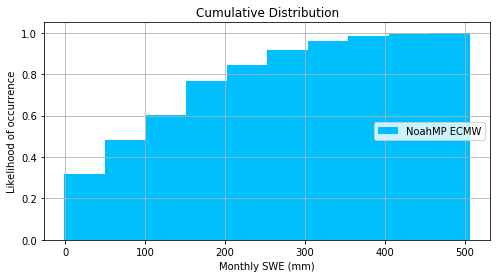

In [46]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data4, density=True, cumulative=True, label='NoahMP ECMW',
         histtype='stepfilled', color='deepskyblue')

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('Monthly SWE (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


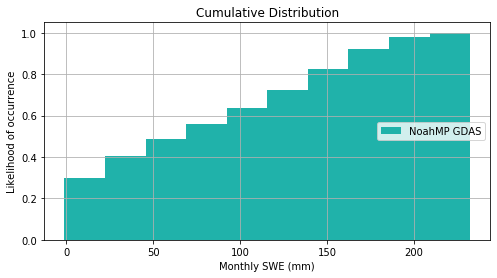

In [47]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data5, density=True, cumulative=True, label='NoahMP GDAS',
         histtype='stepfilled', color='lightseagreen')

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('Monthly SWE (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


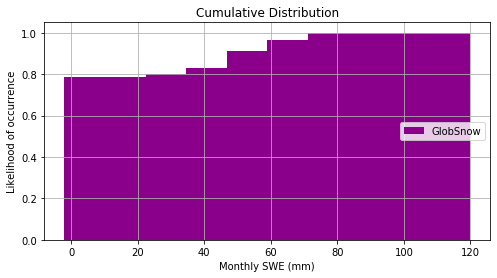

In [48]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data6, density=True, cumulative=True, label='GlobSnow',
         histtype='stepfilled', color='darkmagenta')

ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative Distribution')
ax.set_xlabel('Monthly SWE (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


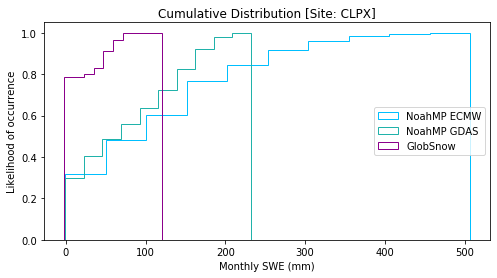

In [49]:
# make a figure
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
ax.hist(flattened_raster_data4, density=True, cumulative=True, label='NoahMP ECMW',
         histtype='step', color='deepskyblue')

# plot the cumulative histogram
ax.hist(flattened_raster_data5, density=True, cumulative=True, label='NoahMP GDAS',
         histtype='step', color='lightseagreen')

# plot the cumulative histogram
ax.hist(flattened_raster_data6, density=True, cumulative=True, label='GlobSnow',
         histtype='step', color='darkmagenta')

ax.grid(False)
ax.legend(loc='right')
ax.set_title('Cumulative Distribution [Site: CLPX]')
ax.set_xlabel('Monthly SWE (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

(1, 550)

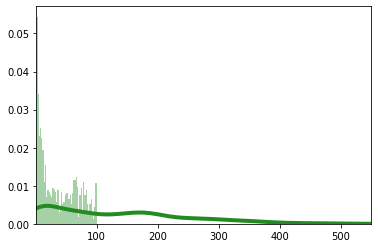

In [50]:
import seaborn as sns
import numpy as np

# Density Plot and Histogram
sns.distplot(flattened_raster_data4, hist=True, kde=True, 
             bins=np.linspace(1, 100, 50), color = 'forestgreen', 
#              hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# # Plot formatting
# # plt.legend(prop={'size': 16}, title = 'Airline')
# plt.title('Density Plot for SWE')
# plt.xlabel('NoahMP ECMW') 
# plt.ylabel('Density')
plt.xlim(xmin=1, xmax = 550)
# plt.ylim(ymin=0, ymax = 0.10)

(1, 550)

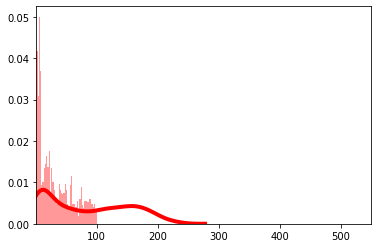

In [51]:
sns.distplot(flattened_raster_data5, hist=True, kde=True, 
             bins=np.linspace(1, 100, 50), color = 'r', 
             kde_kws={'linewidth': 4})
plt.xlim(xmin=1, xmax = 550)

(1, 550)

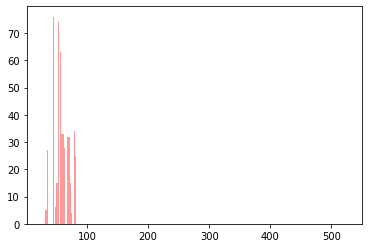

In [52]:
sns.distplot(flattened_raster_data6, hist=True, kde=False, 
             bins=np.linspace(1, 100, 50), color = 'r', 
#              hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xlim(xmin=1, xmax = 550)

C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vicki\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(0, 300)

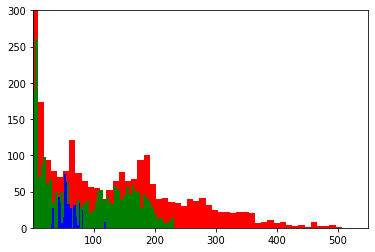

In [53]:
plt.hist(flattened_raster_data4, bins=50, color = 'r')
plt.hist(flattened_raster_data5, bins=50, color = 'g')
plt.hist(flattened_raster_data6, bins=50, color = 'b')
plt.xlim(xmin=1, xmax = 550)
plt.ylim(ymin=0, ymax = 300)